# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, skew, boxcox_normmax
from scipy.special import boxcox1p
from datetime import date
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Get the data

In [2]:
#uploading training and test data
train_data=pd.read_csv('E:\\Kaggle\House Prices Advanced Regression Techniques\\train.csv')
test_data=pd.read_csv('E:\\Kaggle\\House Prices Advanced Regression Techniques\\test.csv')

# EDA

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_data.shape

(1460, 81)

In [6]:
test_data.shape

(1459, 80)

# Data Preposesing

combining training & testing data for preposesing after that we do not write same code for test

In [7]:
df=pd.concat([train_data, test_data], ignore_index=True)

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [9]:
data=df.copy()

In [10]:
df.shape

(2919, 81)

In [11]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


# SalePrice: the variable we're trying to predict

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

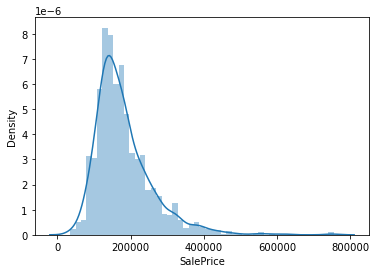

In [14]:
sns.distplot(df[df['SalePrice'].notnull()]['SalePrice'])

# Correlation

In [15]:
train_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


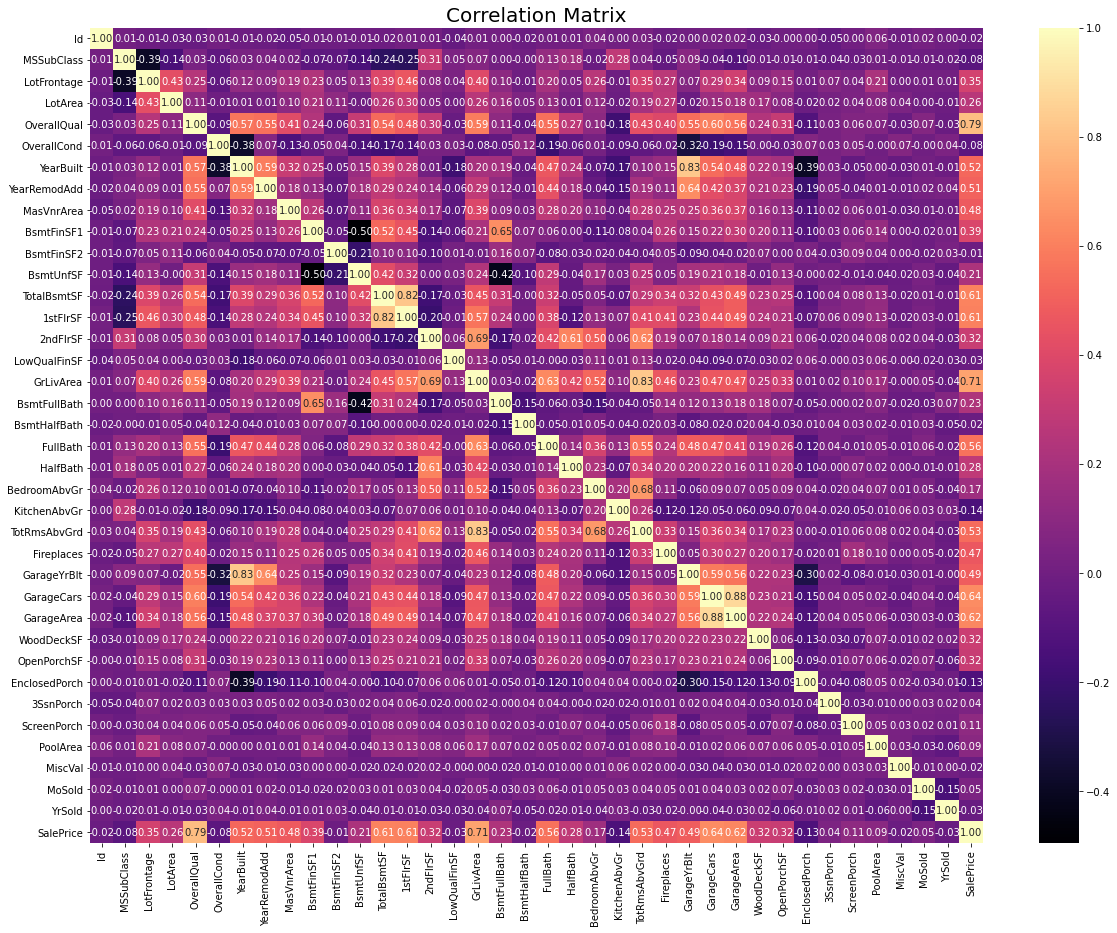

In [16]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [17]:
def find_correlation(df, num_cols, corr_limit=0.60):
    high_corr, low_corr={}, {}
    for col in num_cols:
        if col=='SalePrice':
            pass
        else:
            corr=df[[col, 'SalePrice']].corr().loc[col, 'SalePrice']
            print(col, corr)
            if abs(corr)>corr_limit:
                high_corr[col]=corr
            else:
                low_corr[col]=corr
                
    return high_corr, low_corr

# Feature Engineering

In [18]:
# Some of the non-numeric predictors are stored as numbers; convert them into strings 
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

# Sale price analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

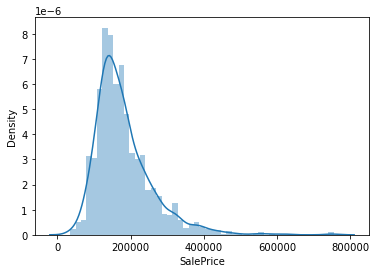

In [19]:
sns.distplot(df[df['SalePrice'].notnull()]['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

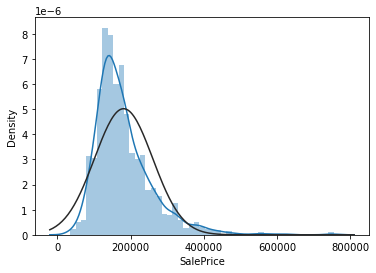

In [20]:
sns.distplot(df[df['SalePrice'].notnull()]['SalePrice'], fit=norm)

In [21]:
#musbetdirse saga carpik, menfidirse sola carpik, 0 ve 0-a yaxin simmetrik
print("Skewness coeff. is: %f" % df[df['SalePrice'].notnull()]['SalePrice'].skew())

#3 olanda SNP, 3-den kicik olanda nisbeten daha basik 3-den boyuk olanda daha dik
print("Kurtosis coeff. is: %f" % df[df['SalePrice'].notnull()]['SalePrice'].kurt())

Skewness coeff. is: 1.882876
Kurtosis coeff. is: 6.536282


In [22]:
# log(1+x) transform
df['SalePrice']=np.log1p(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

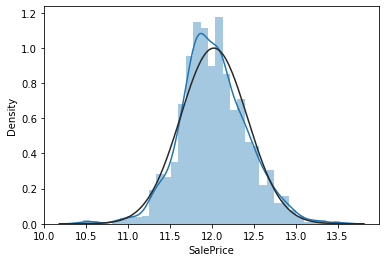

In [23]:
sns.distplot(df[df['SalePrice'].notnull()]['SalePrice'], fit=norm)

# Numerical Variable Analysis

In [24]:
#finding numeric column from data
num_cols=list(df._get_numeric_data().columns)
num_cols.remove('Id')
print(f"Numeric variable numbers: {len(num_cols)}")

Numeric variable numbers: 34


In [25]:
def hist_for_nums(df, numeric_cols):
    for col in numeric_cols:
        df[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()

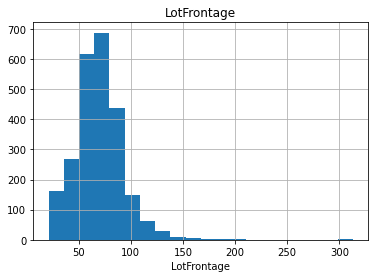

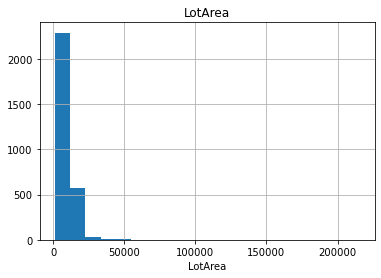

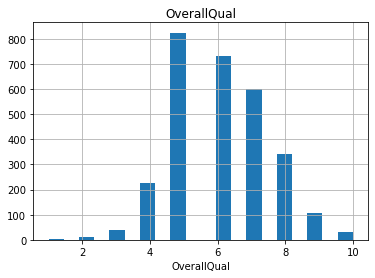

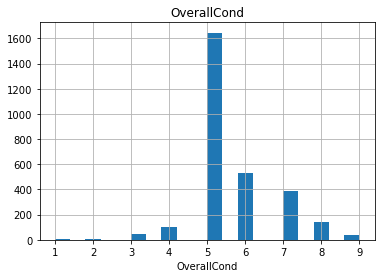

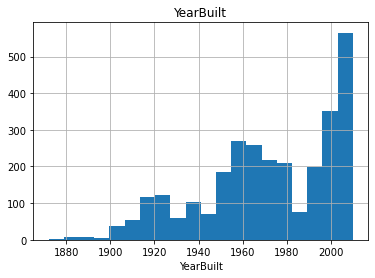

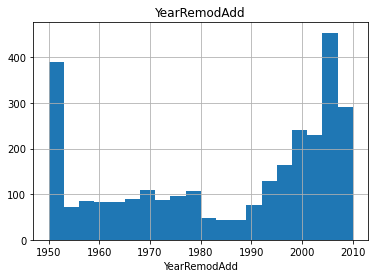

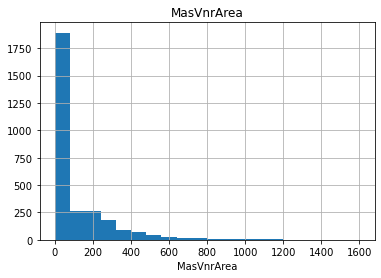

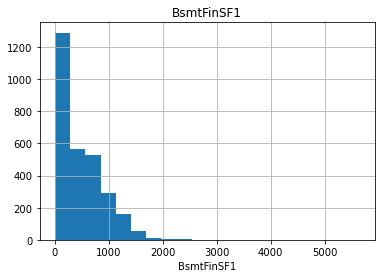

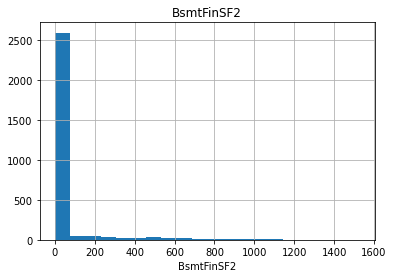

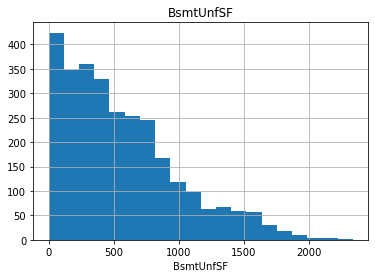

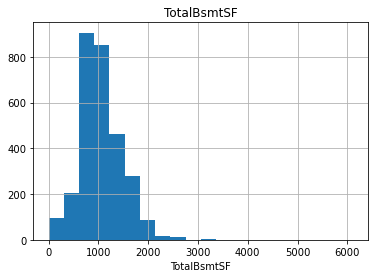

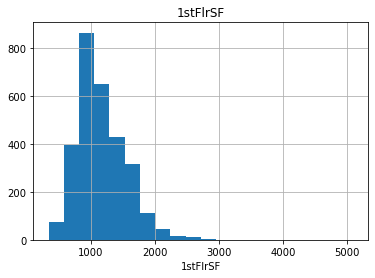

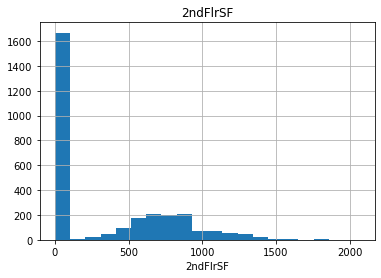

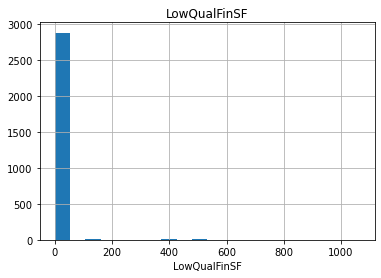

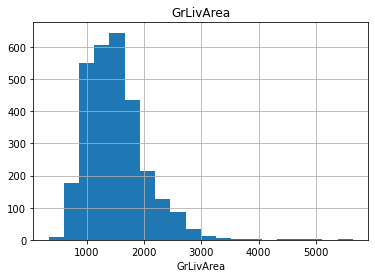

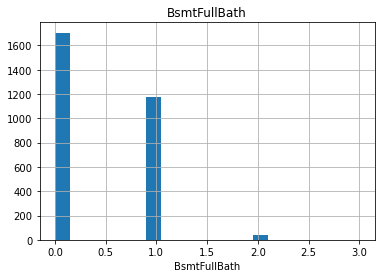

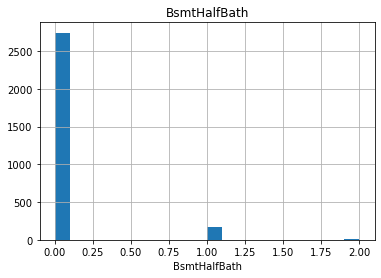

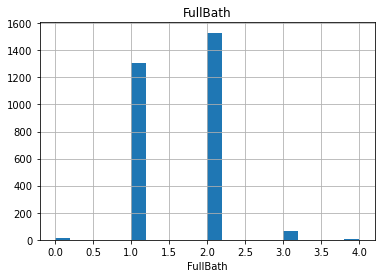

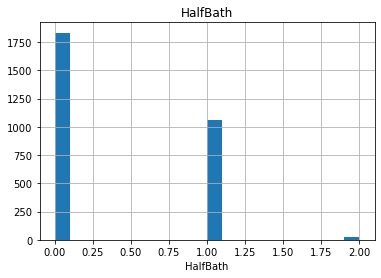

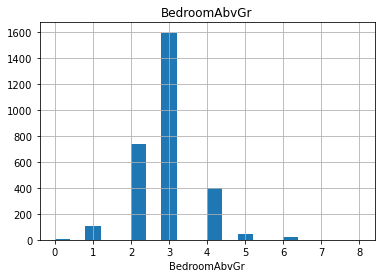

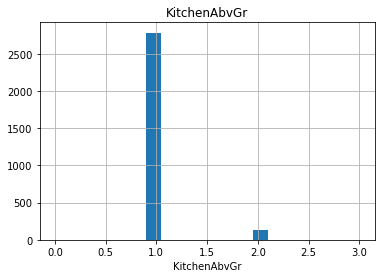

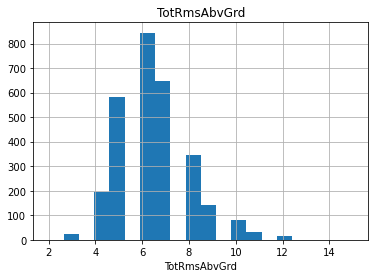

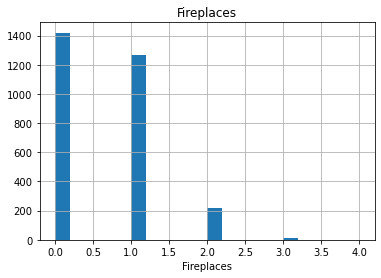

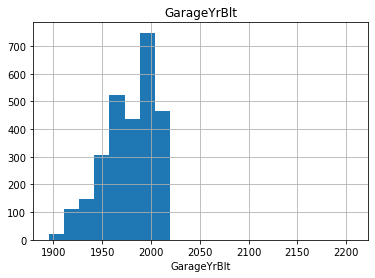

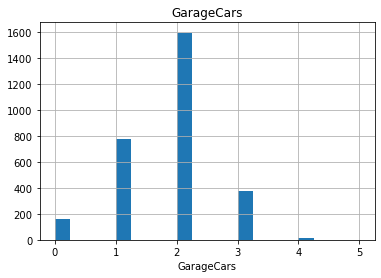

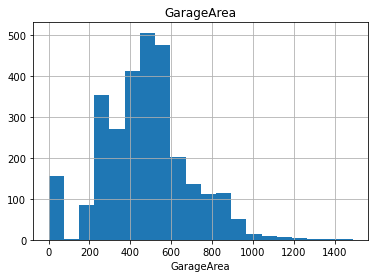

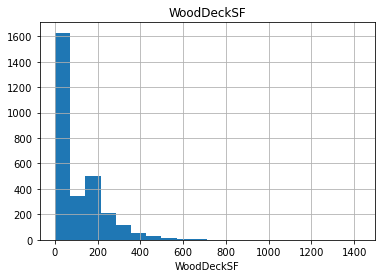

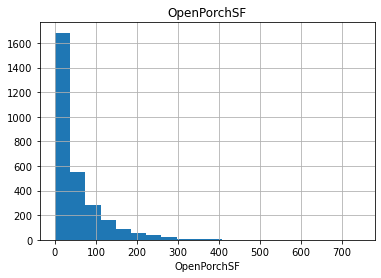

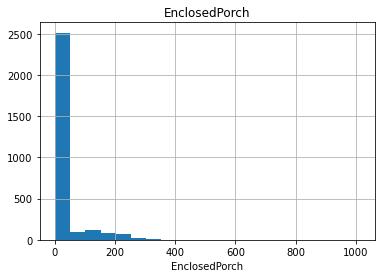

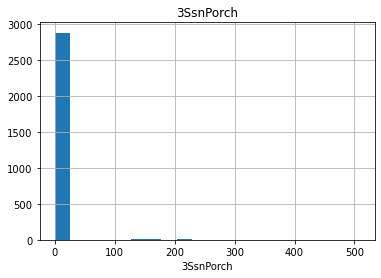

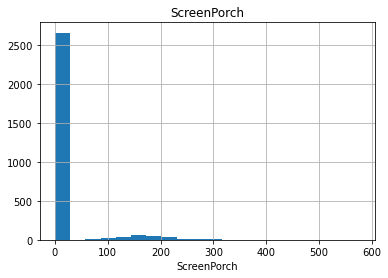

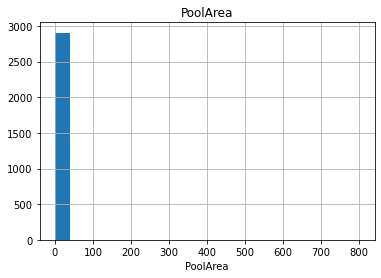

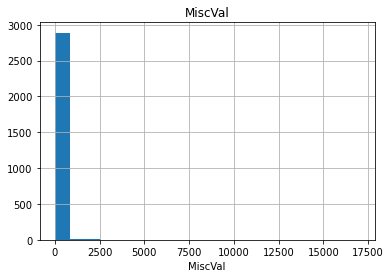

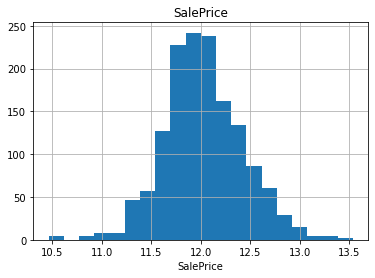

In [26]:
hist_for_nums(df, num_cols)

In [27]:
find_correlation(df, num_cols)

LotFrontage 0.35587862036639983
LotArea 0.2573200650671415
OverallQual 0.8171846144867677
OverallCond -0.036868453834800925
YearBuilt 0.5865701927897159
YearRemodAdd 0.5656077814623218
MasVnrArea 0.43080895642002925
BsmtFinSF1 0.3720232531363665
BsmtFinSF2 0.004832286393226283
BsmtUnfSF 0.22198516464036583
TotalBsmtSF 0.6121342283262261
1stFlrSF 0.5969813231855327
2ndFlrSF 0.3193001388784757
LowQualFinSF -0.03796278590546342
GrLivArea 0.7009269871427138
BsmtFullBath 0.2362241608485916
BsmtHalfBath -0.005149242166159819
FullBath 0.5947706649972533
HalfBath 0.31398222425673405
BedroomAbvGr 0.20904343302573794
KitchenAbvGr -0.14754815783155933
TotRmsAbvGrd 0.5344224002094399
Fireplaces 0.4894495451574806
GarageYrBlt 0.541072777267348
GarageCars 0.6806248726581888
GarageArea 0.650887681143594
WoodDeckSF 0.33413517295611556
OpenPorchSF 0.32105325159091136
EnclosedPorch -0.14905022613071583
3SsnPorch 0.054900201291843045
ScreenPorch 0.1212075883990801
PoolArea 0.06979789535859572
MiscVal -0.

({'OverallQual': 0.8171846144867677,
  'TotalBsmtSF': 0.6121342283262261,
  'GrLivArea': 0.7009269871427138,
  'GarageCars': 0.6806248726581888,
  'GarageArea': 0.650887681143594},
 {'LotFrontage': 0.35587862036639983,
  'LotArea': 0.2573200650671415,
  'OverallCond': -0.036868453834800925,
  'YearBuilt': 0.5865701927897159,
  'YearRemodAdd': 0.5656077814623218,
  'MasVnrArea': 0.43080895642002925,
  'BsmtFinSF1': 0.3720232531363665,
  'BsmtFinSF2': 0.004832286393226283,
  'BsmtUnfSF': 0.22198516464036583,
  '1stFlrSF': 0.5969813231855327,
  '2ndFlrSF': 0.3193001388784757,
  'LowQualFinSF': -0.03796278590546342,
  'BsmtFullBath': 0.2362241608485916,
  'BsmtHalfBath': -0.005149242166159819,
  'FullBath': 0.5947706649972533,
  'HalfBath': 0.31398222425673405,
  'BedroomAbvGr': 0.20904343302573794,
  'KitchenAbvGr': -0.14754815783155933,
  'TotRmsAbvGrd': 0.5344224002094399,
  'Fireplaces': 0.4894495451574806,
  'GarageYrBlt': 0.541072777267348,
  'WoodDeckSF': 0.33413517295611556,
  'Ope

# Categorical Variable Analysis

In [28]:
cat_cols=list(set(df.columns)-set(num_cols))
print('Categorical Features:{}'.format(len(cat_cols)))

Categorical Features:47


In [29]:
df[cat_cols].nunique()

BsmtFinType2        6
Condition2          8
SaleCondition       6
ExterCond           5
Exterior2nd        16
ExterQual           4
Electrical          5
Foundation          6
MSSubClass         16
BsmtFinType1        6
Utilities           2
YrSold              5
MSZoning            5
SaleType            9
Functional          7
LotConfig           5
MasVnrType          4
Condition1          9
RoofStyle           6
LandContour         4
FireplaceQu         5
GarageCond          5
KitchenQual         4
MiscFeature         4
Neighborhood       25
GarageFinish        3
PavedDrive          3
BsmtQual            4
Alley               2
GarageQual          5
Id               2919
LandSlope           3
HouseStyle          8
RoofMatl            8
CentralAir          2
BsmtExposure        4
MoSold             12
Heating             6
BldgType            5
Exterior1st        15
GarageType          6
LotShape            4
HeatingQC           5
Street              2
PoolQC              3
BsmtCond  

In [30]:
#count total value in every catgorical feature
for cat in cat_cols:
    print(f'##########{cat}##########')
    print(df[cat].value_counts(normalize=True))

##########BsmtFinType2##########
Unf    0.878126
Rec    0.036985
LwQ    0.030645
BLQ    0.023952
ALQ    0.018316
GLQ    0.011976
Name: BsmtFinType2, dtype: float64
##########Condition2##########
Norm      0.989723
Feedr     0.004454
Artery    0.001713
PosA      0.001370
PosN      0.001370
RRNn      0.000685
RRAe      0.000343
RRAn      0.000343
Name: Condition2, dtype: float64
##########SaleCondition##########
Normal     0.822885
Partial    0.083933
Abnorml    0.065091
Family     0.015759
Alloca     0.008222
AdjLand    0.004111
Name: SaleCondition, dtype: float64
##########ExterCond##########
TA    0.869476
Gd    0.102432
Fa    0.022953
Ex    0.004111
Po    0.001028
Name: ExterCond, dtype: float64
##########Exterior2nd##########
VinylSd    0.347498
MetalSd    0.153187
HdBoard    0.139136
Wd Sdng    0.133996
Plywood    0.092529
CmentBd    0.043180
Wd Shng    0.027759
BrkFace    0.016107
Stucco     0.016107
AsbShng    0.013023
Brk Cmn    0.007539
ImStucc    0.005141
Stone      0.002056
A

# Outliers

In [31]:
df.drop(df[(df['GrLivArea']>4500) & (df['SalePrice']<300000) ].index, inplace=True)

In [32]:
df[df['GarageYrBlt']==2207]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2592,2593,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,NaN


In [33]:
df.loc[df['GarageYrBlt']==2207, 'GarageYrBlt']=2007

# Missing Values

In [34]:
#Total number of nulls
df.drop('SalePrice', axis=1).isnull().sum().sum()

13958

In [35]:
df.drop('SalePrice', axis=1).isnull().sum().sort_values(ascending=False)

PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
FireplaceQu      1420
                 ... 
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [36]:
total_null=df.drop('SalePrice', axis=1).isnull().sum().sort_values(ascending=False)

In [37]:
percentage=(df.drop('SalePrice', axis=1).isnull().sum()/len(df))
missing_data=pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])

In [38]:
missing_data.head(10)

,Total,Percentage
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508
GarageQual,159,0.054508
GarageCond,159,0.054508


In [39]:
missing_data[missing_data['Percentage']>0.05].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'GarageType'],
      dtype='object')

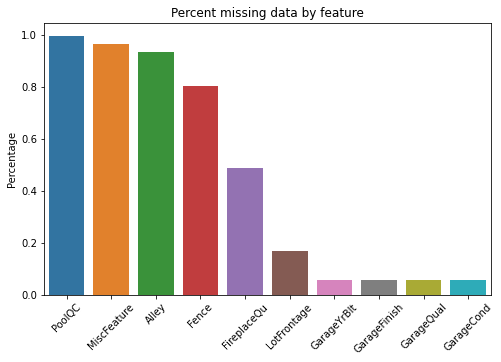

In [40]:
plt.figure(figsize=(8,5))
plt.title('Percent missing data by feature')
sns.barplot(missing_data.head(10).index, missing_data.head(10)['Percentage'])
plt.xticks(rotation=45)
plt.show()

In [41]:
df['Functional']=df['Functional'].fillna('Typ')

In [42]:
df['PoolQC']=df['PoolQC'].fillna('None')

In [43]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col]=df[col].fillna(0)

In [44]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col]=df[col].fillna('None')

In [45]:
for col in ['BsmtQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col]=df[col].fillna('None')

In [46]:
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].apply(lambda x: x.fillna(x.mode()[0]))

In [47]:
#Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [48]:
#filling numrical missing value using fillna
for col in num_cols:
    if col=='SalePrice':
        pass
    else:  
        df[col].fillna(df[col].mean(), inplace=True)

In [49]:
#filling catgorical missing value
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [50]:
#There are no missing values anymore!
df.drop('SalePrice', axis=1).isnull().sum().sum()

0

# Independent variable analysis

In [51]:
skewed_feats = df[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [52]:
skewed_feats.head(10)

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144394
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929745
dtype: float64

In [53]:
skewed_features=(skewed_feats[skewed_feats>0.5]).index
print(len(skewed_features))

25


In [54]:
for col in skewed_features:
     df[col] = boxcox1p(df[col], boxcox_normmax(df[col] + 1))

# Create Interesting features

In [55]:
df['Sold_RemodAdd']=df['YrSold'].astype(int)-df['YearRemodAdd']

In [56]:
df['Sold_Built']=df['YrSold'].astype(int)-df['YearBuilt']

In [57]:
df['TotalSF']=df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']

In [58]:
df['Total_porch_sf'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

In [59]:
df['TotalSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']

In [60]:
df['Sold_GarageYrBlt']=df['YrSold'].astype(int)-df['GarageYrBlt']

In [61]:
df['KitchenBedroomAbvGr']=df['KitchenAbvGr']+df['BedroomAbvGr']

In [62]:
df['GrDividedLotArea']=df['GrLivArea']/df['LotArea']

In [63]:
todays_date = date.today()
df["Building_age"] = todays_date.year - df["YearBuilt"]

In [64]:
df['YrBltAndRemodAdd'] = df['YearRemodAdd'] - df['YearBuilt']

In [65]:
df['All_FlrSF']=df['1stFlrSF']+df['2ndFlrSF']

In [66]:
df['HasTotalBsmtSF']=[ 0 if i==0 else 1 for i in df['TotalBsmtSF'].astype(int) ]

In [67]:
df['Has2ndFlrSF']=[ 0 if i==0 else 1 for i in df['2ndFlrSF'].astype(int) ]

In [68]:
df['HasGarageArea']=[ 0 if i==0 else 1 for i in df['GarageArea'].astype(int) ]

In [69]:
df['HasGarageCars']=[ 0 if i==0 else 1 for i in df['GarageCars'].astype(int) ]

In [70]:
df['HasBsmtQual']= [ 0 if i=="None" else 1 for i in df['BsmtQual'] ]

In [71]:
df['HasPoolArea']=[0 if i==0 else 1 for i in df['PoolArea'].astype(int) ]

In [72]:
df['HasTotalBsmtSF']=[0 if i==0 else 1 for i in df['TotalBsmtSF'].astype(int) ]

In [73]:
df['HasFireplaces']=[ 0 if i==0 else 1 for i in df['Fireplaces'].astype(int) ]

In [74]:
df['Has2ndfloor'] =[ 0 if i==0 else 1 for i in df['2ndFlrSF'].astype(int) ]

In [75]:
df['HasWoodDeckSF']=[0 if i==0 else 1 for i in df['WoodDeckSF'].astype(int) ]

In [76]:
df["HasCentralAir"]=[ 1 if i=='Y' else 0 for i in df["CentralAir"] ]

In [77]:
df['HasLotFrontage'] =[ 0 if i==0 else 1 for i in df['LotFrontage'].astype(int) ]

In [78]:
df['HasMasVnrArea'] =[ 0 if i==0 else 1 for i in df['MasVnrArea'].astype(int) ]

In [79]:
df['HasBsmtFinSF1'] =[ 0 if i==0 else 1 for i in df['BsmtFinSF1'].astype(int) ]

In [80]:
df=df.drop(['Utilities', 'Street', 'PoolQC', ], axis=1)

# here we use minmax scaler for scaling numeric fields

In [81]:
num_cols=list(df._get_numeric_data().columns)
num_cols.remove('Id')
cat_cols=list(set(df.columns)-set(num_cols))
numerical=list(set(num_cols)-set(['SalePrice']))
scaler = preprocessing.MinMaxScaler()
df[numerical]=scaler.fit_transform(df[numerical])

# Encode categorical features

In [82]:
df=pd.get_dummies(df, drop_first=True)

In [83]:
df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.241215,0.315220,0.666667,0.536679,0.949275,0.883333,0.387155,0.291526,0.0,...,0,0,0,0,1,0,0,0,1,0
1,2,0.305987,0.338667,0.555556,0.888355,0.753623,0.433333,0.000000,0.367601,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,0.254622,0.368183,0.666667,0.536679,0.934783,0.866667,0.353931,0.223394,0.0,...,0,0,0,0,1,0,0,0,1,0
3,4,0.218294,0.337702,0.666667,0.536679,0.311594,0.333333,0.000000,0.124985,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,0.322395,0.413083,0.777778,0.536679,0.927536,0.833333,0.506410,0.276366,0.0,...,0,0,0,0,1,0,0,0,1,0


In [84]:
train=df[df['SalePrice'].notnull()].drop('Id', axis=1)
test=df[df['SalePrice'].isnull()].drop('SalePrice', axis=1)

In [85]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.241215,0.315220,0.666667,0.536679,0.949275,0.883333,0.387155,0.291526,0.0,0.194981,...,0,0,0,0,1,0,0,0,1,0
1,0.305987,0.338667,0.555556,0.888355,0.753623,0.433333,0.000000,0.367601,0.0,0.286917,...,0,0,0,0,1,0,0,0,1,0
2,0.254622,0.368183,0.666667,0.536679,0.934783,0.866667,0.353931,0.223394,0.0,0.369856,...,0,0,0,0,1,0,0,0,1,0
3,0.218294,0.337702,0.666667,0.536679,0.311594,0.333333,0.000000,0.124985,0.0,0.421279,...,0,0,0,0,1,0,0,0,0,0
4,0.322395,0.413083,0.777778,0.536679,0.927536,0.833333,0.506410,0.276366,0.0,0.397607,...,0,0,0,0,1,0,0,0,1,0


In [86]:
test.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,0.305987,0.374288,0.444444,0.657139,0.644928,0.183333,0.000000,0.217456,0.541353,...,0,0,0,0,1,0,0,0,1,0
1461,1462,0.310120,0.413176,0.555556,0.657139,0.623188,0.133333,0.291551,0.352779,0.000000,...,0,0,0,0,1,0,0,0,1,0
1462,1463,0.280731,0.407231,0.444444,0.536679,0.905797,0.800000,0.000000,0.316099,0.000000,...,0,0,0,0,1,0,0,0,1,0
1463,1464,0.297657,0.345816,0.555556,0.657139,0.913043,0.800000,0.122413,0.260240,0.000000,...,0,0,0,0,1,0,0,0,1,0
1464,1465,0.133767,0.221700,0.777778,0.536679,0.869565,0.700000,0.000000,0.143969,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [87]:
X = train.drop(["SalePrice"], axis=1)
Y=train[['SalePrice']]

# Submission function

In [88]:
def submission(test, predict):
    res=test.copy()
    res['SalePrice']=np.around(pre, 2)
    res['Id']=res.astype(int)
    return res[['Id', 'SalePrice']]

# Setup models

In [89]:
def model_tuning(X, Y, algo, algo_cv, grid, split_share=0.20, cv=10):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=split_share)
    model_cv=algo_cv(alphas=grid, cv=cv)
    model_cv.fit(X_train, Y_train)
    model_tuned=algo(alpha=model_cv.alpha_)
    model_tuned.fit(X_train, Y_train)
    train_rmse=np.sqrt(mean_squared_error(Y_train, model_tuned.predict(X_train)))
    test_rmse=np.sqrt(mean_squared_error(Y_test, model_tuned.predict(X_test)))
    return (type(algo()).__name__, train_rmse, test_rmse) 

In [90]:
models={Ridge: RidgeCV, Lasso:LassoCV, ElasticNet:ElasticNetCV}
results_tuned={'model':[], 'train_rmse':[], 'test_rmse':[]}
alphas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 5e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]

In [91]:
for model in models:
    res=model_tuning(X, Y, model, models[model], alphas)
    results_tuned['model'].append(res[0])
    results_tuned['train_rmse'].append(res[1])
    results_tuned['test_rmse'].append(res[2])

In [92]:
results_tuned=pd.DataFrame(results_tuned)
results_tuned

,model,train_rmse,test_rmse
0,Ridge,0.091836,0.125388
1,Lasso,0.098608,0.117110
2,ElasticNet,0.098064,0.118494


# Final Model

In [93]:
#0.12517
alphas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 5e-2, 0.1, 0.3, 1, 3, 5, 
          10, 15, 18, 20, 30, 50, 75, 100, 0.001, 0.0005]
model_cv=LassoCV(alphas=alphas, cv=20)
model_cv.fit(X, Y)
model_tuned=Lasso(alpha=model_cv.alpha_, max_iter=50000)
model_tuned.fit(X, Y)
pre=model_tuned.predict(test.drop('Id', axis=1))
res=submission(test, pre)
res['SalePrice']=np.exp(res['SalePrice'])
res.to_csv('submission.csv', index=False)